In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [3]:
run_path = '../'
test_name = 'Burgers_1+1D_scheduled'
test_path = os.path.join(run_path, test_name)

In [4]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

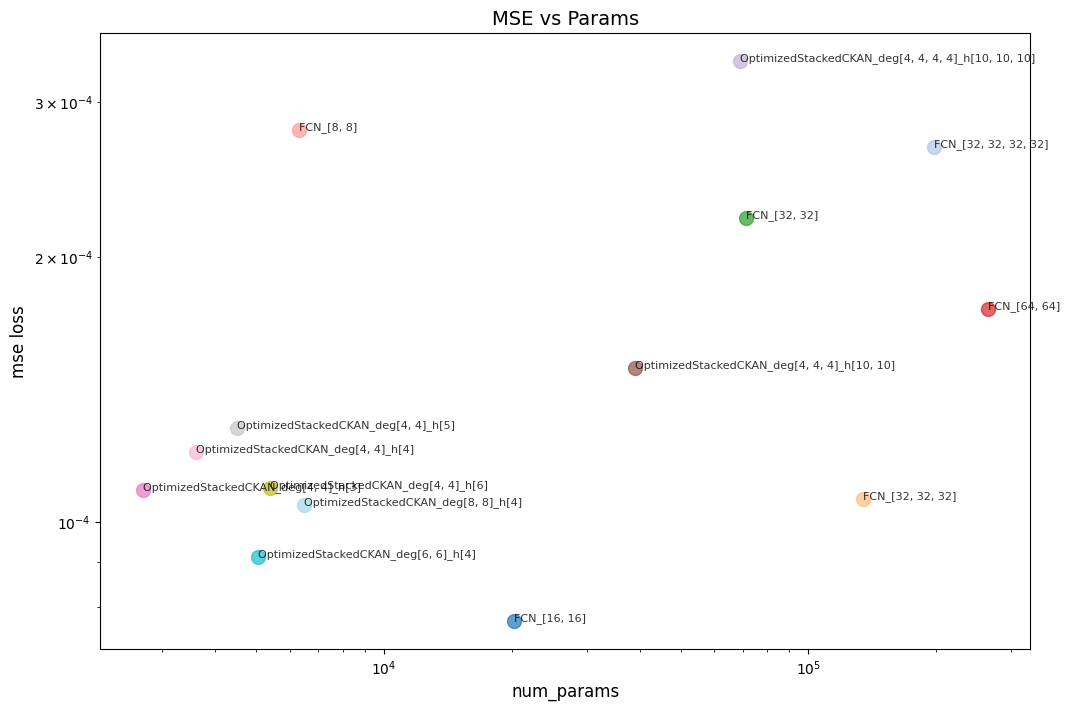

In [5]:
analyser.plot_mse_over_params()

In [6]:
analyser.runs

['FCN_[16, 16]',
 'FCN_[32, 32, 32, 32]',
 'FCN_[32, 32, 32]',
 'FCN_[32, 32]',
 'FCN_[64, 64]',
 'FCN_[8, 8]',
 'OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[10, 10, 10]',
 'OptimizedStackedCKAN_deg[4, 4, 4]_h[10, 10]',
 'OptimizedStackedCKAN_deg[4, 4]_h[3]',
 'OptimizedStackedCKAN_deg[4, 4]_h[4]',
 'OptimizedStackedCKAN_deg[4, 4]_h[5]',
 'OptimizedStackedCKAN_deg[4, 4]_h[6]',
 'OptimizedStackedCKAN_deg[6, 6]_h[4]',
 'OptimizedStackedCKAN_deg[8, 8]_h[4]']

Text(0.5, 1.0, 'MSE for models with 1 hidden layer')

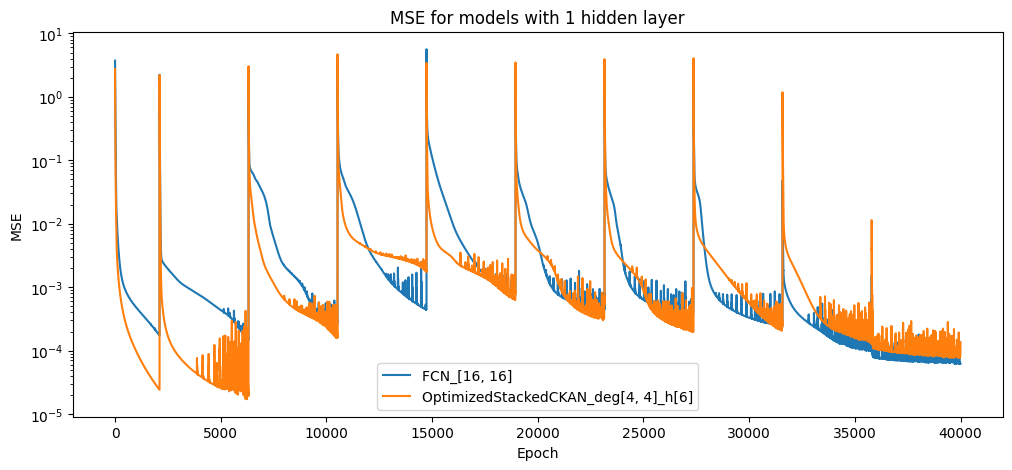

In [21]:
l1 = [
    'OptimizedStackedCKAN_deg[4, 4]_h[6]',
    'FCN_[16, 16]'
]
l2 = [
    'OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[10, 10, 10]',
    'FCN_[32, 32, 32]',
]

plt.figure(figsize=(12, 5))

# plt.subplot(2, 1, 1)
analyser.plot_mses(filter=lambda x: x in l1, noshow=True)
plt.title('MSE for models with 1 hidden layer')

# plt.subplot(2, 1, 2)
# analyser.plot_mses(filter=lambda x: x in l2, noshow=True)
# plt.title('MSE for models with 3 hidden layers')

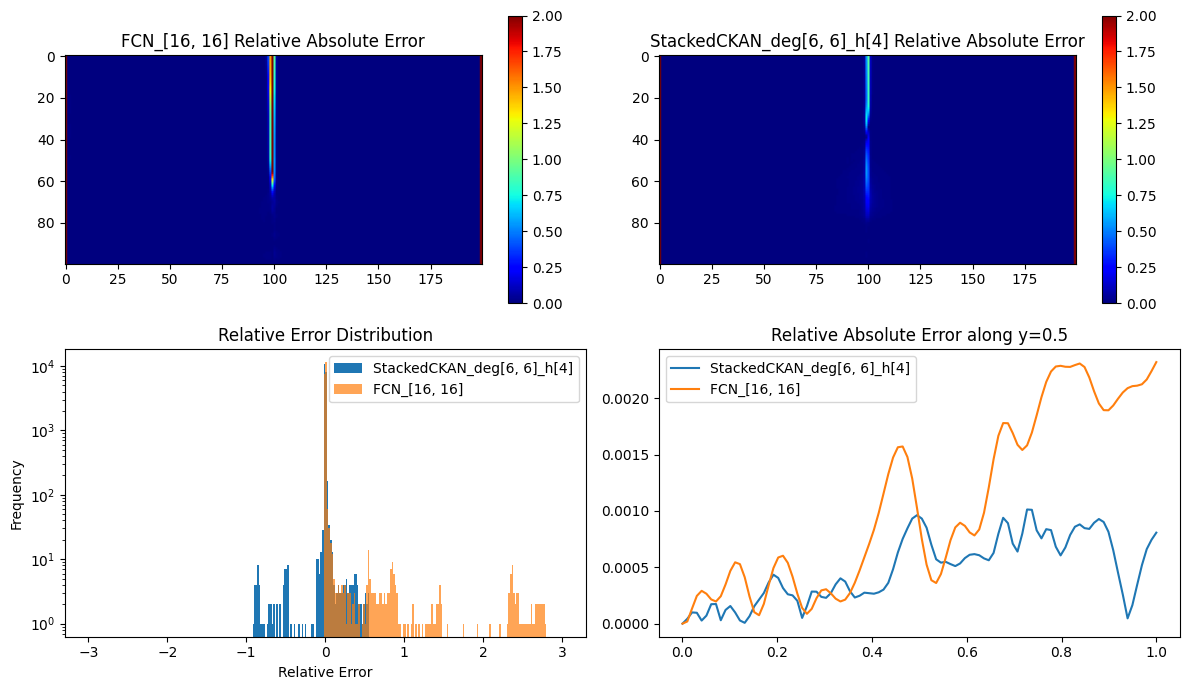

In [18]:
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/OptimizedStackedCKAN_deg[6, 6]_h[4]/test_40000.npy', 'rb') as f:
    pred0_ckan = np.load(f).reshape(200, 100, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_[16, 16]/test_40000.npy', 'rb') as f:
    pred0_fcn = np.load(f).reshape(200, 100, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_[16, 16]/test_exact.npy', 'rb') as f:
    exact0 = np.load(f).reshape(200, 100, -1)

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))
rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))

plt.figure(figsize=(12, 7))

slice=0
vmin, vmax = 0, 2
plt.subplot(2, 2, 1)
plt.imshow(rae(exact0[:, ::-1, slice], pred0_fcn[:, ::-1, slice]).T, cmap='jet', vmin=vmin, vmax=vmax) #
plt.title('FCN_[16, 16] Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(rae(exact0[:, ::-1, slice], pred0_ckan[:, ::-1, slice]).T, cmap='jet', vmin=vmin, vmax=vmax) #
plt.title('StackedCKAN_deg[6, 6]_h[4] Relative Absolute Error')
plt.colorbar()

plt.subplot(2, 2, 3)
range=(-3, 3)
re_ckan = rE(exact0[1:199, 1:99, slice], pred0_ckan[1:199, 1:99, slice])
re_fcn = rE(exact0[1:199, 1:99, slice], pred0_fcn[1:199, 1:99, slice])
plt.hist(re_ckan.flatten(), bins=300, label='StackedCKAN_deg[6, 6]_h[4]', range=range)
plt.hist(re_fcn.flatten(), bins=300, label='FCN_[16, 16]', alpha=0.7, range=range)
plt.legend()
plt.yscale('log')
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.title('Relative Error Distribution')

xs = np.linspace(0, 1, 100)
plt.subplot(2, 2, 4)
n=50
plt.plot(xs, rae(exact0[n, :, slice], pred0_ckan[n, :, slice]), label='StackedCKAN_deg[6, 6]_h[4]')
plt.plot(xs, rae(exact0[n, :, slice], pred0_fcn[n, :, slice]), label='FCN_[16, 16]')
plt.legend()
plt.title('Relative Absolute Error along y=0.5')

plt.tight_layout()
plt.show()

In [9]:
import json

In [10]:
def plot_ps(params, ins, n, label):
    xs = np.arange(n)
    ys = np.zeros_like(xs)

    ins.append(n)
    for i, (a, b) in enumerate(zip(ins[:-1], ins[1:])):
        ys[a:b] = params[i]

    plt.plot(xs, ys, label=label)

[5400, 5400, 5400, 5400, 5400, 5400, 5400, 5400, 3600, 1800]
[18000]


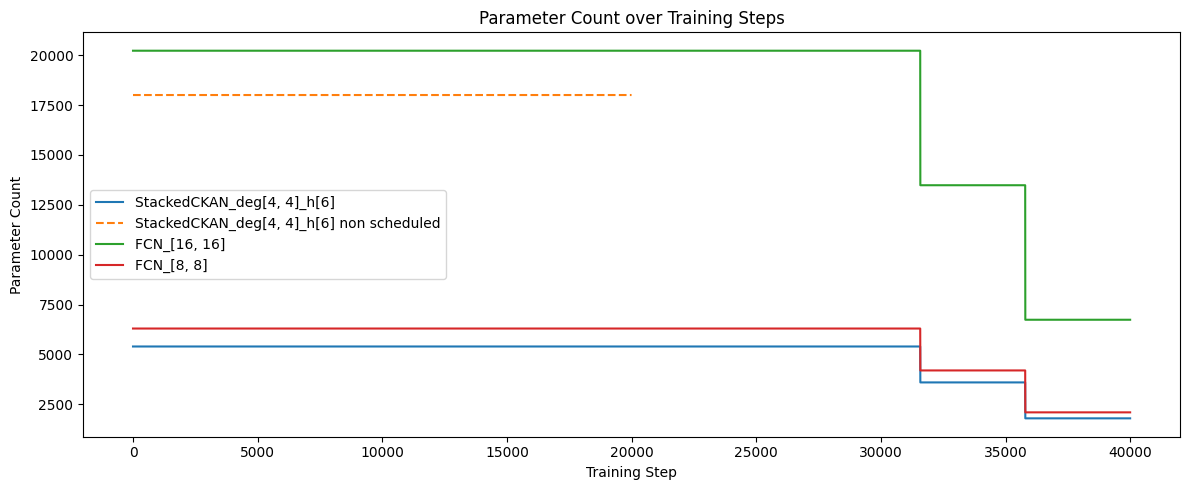

In [19]:
plt.figure(figsize=(12, 5))

with open(os.path.join(test_path, 'OptimizedStackedCKAN_deg[4, 4]_h[6]', 'test_meta.json'), 'r') as f:
    meta = json.load(f)
params = meta['param_count']
get_ins = meta['get_inputs']
print(params)
plot_ps(params, get_ins, 40000, label='StackedCKAN_deg[4, 4]_h[6]')

with open(os.path.join(run_path, 'Burgers_1+1D', 'StackedCKAN_deg[4, 4]_h[6]', 'test_meta.json'), 'r') as f:
    meta = json.load(f)
xs = np.arange(20000)
print(meta['param_count'])
plt.plot(xs, np.ones(20000) * meta['param_count'], label='StackedCKAN_deg[4, 4]_h[6] non scheduled', linestyle='--')

with open(os.path.join(test_path, 'FCN_[16, 16]', 'test_meta.json'), 'r') as f:
    meta = json.load(f)
params = meta['param_count']
get_ins = meta['get_inputs']
plot_ps(params, get_ins, 40000, label='FCN_[16, 16]')

with open(os.path.join(test_path, 'FCN_[8, 8]', 'test_meta.json'), 'r') as f:
    meta = json.load(f)
params = meta['param_count']
get_ins = meta['get_inputs']
plot_ps(params, get_ins, 40000, label='FCN_[8, 8]')


plt.legend()
plt.xlabel('Training Step')
plt.ylabel('Parameter Count')
plt.title('Parameter Count over Training Steps')
plt.tight_layout()
plt.show()
